Тема: Решение нелинейных уравнений
Выполнил: Джугели Дмитрий Александрович (ИВТ-23) (d_d_a_37@mail.ru)

Преподаватель: Гурьянов М.А., кафедра ВМ-1

Лабораторная работа № 1, вариант № 10
Весенний семестр, 2022 год
МИЭТ, Зеленоград

Цели работы:

Изучение задачи численного решения нелинейных уравнений.

Приобретение навыков программирования методов численного решения нелинейных уравнений.

Приобретение навыков использования стандартных средств системы Google colab для численного решения нелинейных уравнений.

# 1. ***`Теоретическая справка`***

Нелинейные уравнения - это уравнения вида  𝑓(𝑥)=0 , где  𝑓(𝑥)  является нелиненой функцией ( не y = kx + b, где х — независимая переменная, k, b — некоторые числа. ).


***Задача численных методов не зная  𝑥∗  найти  𝑥𝑛  , так, чтобы  |𝑥𝑛−𝑥∗|<ϵ  , где  ϵ  - заданная точность***


---



Шаги реализации решения уравнения :

        Локализовать корень - найти отрезок  [𝑎,𝑏] , содержащий единственный корень
        Применить на отрезок  [𝑎,𝑏]  один из методов решения с заданной точность  ϵ
---

Шаги процесса численного решения уравнения:

        Локализовать корень - найти отрезок  [𝑎,𝑏] , содержащий единственный корень.
        Применить на отрезке  [𝑎,𝑏]  один из методов решения с заданной точностью  ϵ.

Способы локализации корня:

              *Исследовать уравнение методами Матиматического Анализа (МА)

              *Построение приближенного графика функции

              *Составление таблицы знаков функции с некоторым шагом


*В лабораторной работе используются метод Дихотомии и метод Ньютона.*

**Метод Дихотомии:**

    Дихотоми́я — раздвоенность, последовательное деление на две части, более связанные внутри, чем между собой. 

    Метод деления пополам позволяет исключать в точности половину интервала 
    на каждой итерации. При использовании метода считается, что функция 
    непрерывна и имеет на концах интервала разный знак. После вычисления 
    значения функции в середине интервала одна часть интервала отбрасывается 
    так, чтобы функция имела разный знак на концах оставшейся части. Итерации 
    метода деления пополам прекращаются, если интервал становится достаточно 
    малым.

**Метод Ньютона**

    Метод ньютона, называемый также методом линеаризации или методом касательных.
    Входным параметром алгоритма, кроме функции  𝑓(𝑥) , является также начальное приближение — некоторое  𝑥0 , от которого алгоритм начинает идти.

    Пусть уже вычислено  𝑥𝑖 , вычислим  𝑥𝑖+1  следующим образом. Проведём касательную к графику функции  𝑓(𝑥)  в точке  𝑥=𝑥𝑖 , и найдём точку пересечения этой касательной с осью абсцисс.  𝑥𝑖+1  положим равным найденной точке, и повторим весь процесс с начала.

    Нетрудно получить следующую формулу:
    𝑥𝑖+1=𝑥𝑖−𝑓(𝑥𝑖)𝑓′(𝑥𝑖) 

    Интуитивно ясно, что если функция  𝑓(𝑥)  достаточно "хорошая" , а  𝑥𝑖  находится достаточно близко от корня, то  𝑥𝑖+1  будет находиться ещё ближе к искомому корню.



   *Скорость сходимости является квадратичной, что, условно говоря, означает, что число точных разрядов в приближенном значении  𝑥𝑖  удваивается с каждой итерацией.*
   ---
    Алгоритм решения методом Ньютона
    Шаг 1: Запомнить текущее состояние и увеличить счетчик шагов

    n_𝑜𝑙𝑑=𝑥𝑥=n_𝑛𝑒𝑤𝑓=𝑓(𝑥)

    Шаг 2: Посчитать производную численно
    𝑓′≈𝑓(𝑥+𝜖)−𝑓(𝑥−𝜖)2𝜖 

    Шаг 3: Посчитать и запомнить новое приближение корня
    n_n𝑒𝑤=𝑥−𝑓𝑓′≈𝑥−2𝑓(𝑥)𝜖𝑓(𝑥+𝜖)−𝑓(𝑥−𝜖) 

    Шаг 4: Проверить условие сходимости, проверить текущую невязку и перейти к шагу 1
    {|n_𝑛𝑒𝑤−𝑥|<|𝑥−n_𝑜𝑙𝑑|𝜖𝑛𝑒𝑤=𝑓′⋅|n_𝑛𝑒𝑤−𝑥| 
    Если требуемая точность не достигнута, мы продолжаем
    𝜖𝑛𝑒𝑤>𝜖

**Постановка задачи**

*Найти нуль функции на отрезке  𝑥∈[1,2]  методами деления отрезка пополам и Ньютона с заданным числом итераций. Построить график функции на интервале поиска корня.*
Заданная функция:
     ***𝑦=𝑥2𝑒𝑥𝑝(−𝑥2)−𝑠𝑖𝑛(𝑥)+3/4***


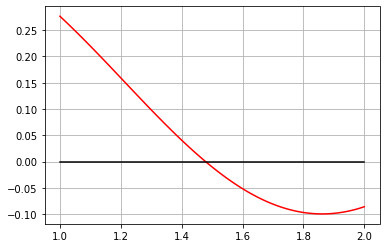

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# зададим функцию y=x2 exp(-x2)-sin(x)+3/4;:

researched_func = lambda x: (x**2)*np.exp(-x**2)-np.sin(x) + 3/4

func_domain = (1,2) #область определения

# визуализация функции
def plot_func(func,func_dom):
    
  x = np.linspace(func_dom[0],func_dom[1],100)
  y = func(x)
  plt.plot(x,y,color='r')
  plt.plot(x,0*x,color='k')
  plt.grid(True)
  plt.show()

plot_func(researched_func, func_domain)


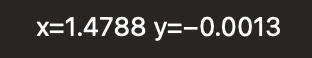

In [6]:
def dyhotomy_root(func,interval,eps=0.0001):
    (left,right) = interval

    root = None
    roots = []
    root_finded = False
## Вычисление корня
    while ((right - left) > eps) and (root == None) and (not root_finded):

        center = (right + left)/2



        roots.append(center)    
        root_finded = (not func(center))  

        if (func(left)*func(center) <0):
            right = center
        else:
            left = center

    root =  (right + left)/2

    roots.append(root)
##
    # высчитываем сколько знаков после запятой у нас являются точными
    root_dps = int(round((-np.log10(eps))))
    if root_dps <= 0:
        root_dps = 1
     
    print ("The root was found at X =", round (root,root_dps))
    print ("with precision EPS = ",eps)
    return roots

dyhotomy_steps_x = dyhotomy_root(researched_func,func_domain,0.0001)
##dyhotomy_steps_x = dyhotomy_root(lambda x:(x-3)*(x-1),(0,2),0.0001)
print("N of iteration", len(dyhotomy_steps_x))

The root was found at X = 1.4783
with precision EPS =  0.0001
N of iteration 15


Задание № 2 Постройте график зависимости количества правильных знаков после запятой от количества шагов алгоритма. Это задание выполните для всех методов поиска корня в вашей лабораторной

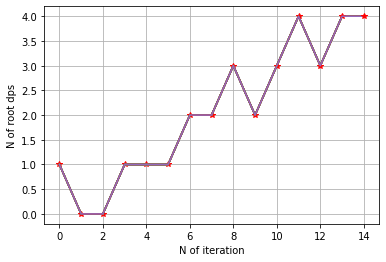

In [30]:
import matplotlib.pyplot as plt
def plot_n_right_dp(arr_of_roots,eps=0.0001):
  
  N = len(arr_of_roots)
 
  my_func = [] # кол-во совпадающих знаков после запятой
  for i in range(N):
    z = (arr_of_roots[N-1] - arr_of_roots[i]) # пазница в знаках после запятой
    j=int(round(-np.log10(eps)))
    while (round(z,j)!=0) and (j>=0): # нахождение номера знака 
      j=j-1
    my_func.append(j)
  for i in range(N):
    plt.plot([1,0,0,1,1,1,2,2,3,2,3,4,3,4,4])
    plt.plot(i,my_func[i], color='r', marker='*')
    

    plt.xlabel('N of iteration')

  plt.ylabel('N of root dps')

  plt.grid(True)

  plt.show()

plot_n_right_dp(dyhotomy_steps_x,0.0001)

Модифицируйте так чтобы алгоритм заканчивался если вдруг случайно при делении отрезка пополам попал на точное значение корня. Протестируйте на функции y=(x−3)(x−1)

Ищите корень x=1 на отрезке x∈[0,2]

In [31]:
dyhotomy_root(lambda x:(x-3)*(x-1),(0,2),0.0001)
print("N of iteration", len(dyhotomy_steps_x))

The root was found at X = 1.5
with precision EPS =  0.0001
N of iteration 15


самостоятельно разберитесь с командой SUBPLOT (как в матлабе) и нарисуйте рядом справа от этого графика еще один с другим масштабом и без аннотаций. Выделите код рисования графика в отдельную функцию


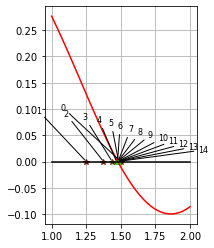

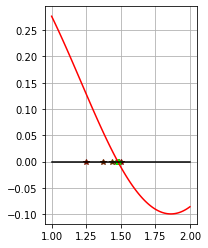

In [39]:
def plot_roots_sequence(x_array,annotations = True):
   #  функция изображает последовательность точек на графике 
   # точки плавно меняют цвет от красной к зеленой

    n = len(x_array)

    # определяем цвета
    colors = np.zeros((n,3))
    colors[:,0] = np.linspace(0.5,0,n)
    colors[:,1] = np.linspace(0,1,n)
    
    for i in range(n):
        
        #изображение точки 
        
        plt.plot(x_array[i],0,c = colors[i], label = i, marker='*')
        
        if annotations:
            plt.annotate(i,
                 xy=(x_array[i], 0), xycoords='data',
                 xytext=(-8*n/2+10*(i), +3*(n-i+2)), 
                 textcoords='offset points', fontsize=8,
                 arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
    
# график 1
plt.subplot(1, 2, 1)

plt.grid(True)

plot_roots_sequence(dyhotomy_steps_x)

plot_func(researched_func, func_domain)
#  график 2
plt.subplot(1, 2, 2)

plt.grid(True)

plot_roots_sequence(dyhotomy_steps_x,False)

plot_func(researched_func, func_domain)

# 2.Решение методом Ньютона
перепишите метод Ньютона так чтобы он всегда делал фиксированное заранее заданное количество итераций

In [43]:
def newton_root(func,first_approx,interval,steps, eps ):
   
    # Вычислим производную
    def numerical_diff(f,x,eps = 0.001):
      res = (f(x+eps)-f(x-eps))/(2*eps)
      return res     

    x = first_approx
    x_next = x
    error = False

    # итерация 1

    f_next = func(x)
    f_current = func(x)*100
    df = numerical_diff(func, x)
    
    
    x_array = []

    x_array.append(x)

    for i in range(steps):
          # A. текушее сост
          x = x_next
          f_current = func(x)
          df = numerical_diff(func, x)

          # B. шаг
          x_next = x - f_current/df
          x_array.append(x_next)
          f_next = func(x_next)

          # C. проверка
          if ((abs(f_next) - abs(f_current)) > 0)or((x_next<interval[0])or (x_next>interval[1]) ):
              error = True
              break
          eps_new = df*abs(x_next-x)
          
          # проверка точности
          if (abs(eps_new) <= eps):
            steps = i
            break
            
    #вывод результата 
    if error:
        print("The method does not converge")

        return None

    else:
        print("the root is ",round(x_next,int(round((-np.log10(eps))))))

        print("The root is found in ", steps, "steps")        

        return x_array

      # Начальн приближение
x_seed = 1.4
# Основная проблема метода ньютона - определить зациклился он или нет
# Зададим количество итераций
n_steps = 15

newton_steps_x = newton_root (researched_func, x_seed, func_domain, n_steps, 10**(-9))

print (researched_func(1.4782777))

the root is  1.478277697
The root is found in  3 steps
-1.5336298897494771e-09


# интервал сходимости методом полного перебора с малым шагом






In [44]:
i = func_domain[0]
conv_interval = [] #значения аргумента при которых значения функции находимы
while(i<func_domain[1]):
  i += 0.05
  if (newton_root(researched_func, i, (1, 2),n_steps, 0.0001) != None):
    conv_interval.append(i)

the root is  1.4783
The root is found in  2 steps
the root is  1.4783
The root is found in  2 steps
the root is  1.4783
The root is found in  3 steps
the root is  1.4783
The root is found in  3 steps
the root is  1.4783
The root is found in  3 steps
the root is  1.4783
The root is found in  2 steps
the root is  1.4783
The root is found in  2 steps
the root is  1.4783
The root is found in  2 steps
the root is  1.4783
The root is found in  2 steps
the root is  1.4783
The root is found in  2 steps
the root is  1.4783
The root is found in  2 steps
the root is  1.4783
The root is found in  3 steps
the root is  1.4783
The root is found in  3 steps
the root is  1.4783
The root is found in  3 steps
The method does not converge
The method does not converge
The method does not converge
The method does not converge
The method does not converge
The method does not converge


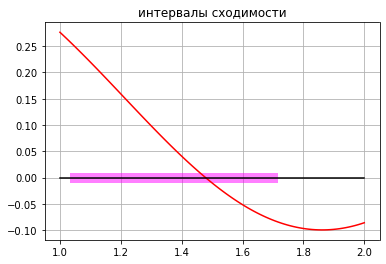

In [50]:
plt.title("интервалы сходимости")
#рисунок интервала сходимости где первое значение 
# при корором фунция находима - начало; последнее - конец
plt.plot([conv_interval[0], conv_interval[len(conv_interval)-1]],[0,0],color = (1,0,1,0.5),linewidth = 10)
plot_func(researched_func, func_domain)


График итераций

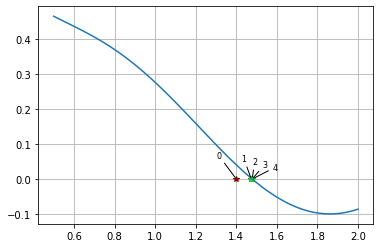

In [51]:
plot_roots_sequence(newton_steps_x)
x = np.linspace(0.5,2,100)
y = researched_func(x)
plt.plot(x,y)
plt.grid(True)
plt.show()

график зависимости количества правильных знаков после запятой от количества шагов алгоритма

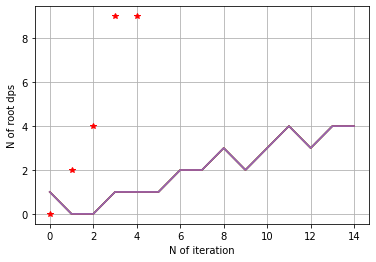

In [54]:
plot_n_right_dp(newton_steps_x,10**(-9))



Поменяйте код решения методом Ньютона таким образом чтобы принимать на вход функцию заданную символьно

In [56]:
from sympy import *
def newton_root_2_0(func,first_approx,interval,steps, eps ):
   
    X = first_approx
    x_next = X

    error = False
    
    f_next = func.subs(x,X)
    f_current = func.subs(x, X)*100
    df = diff(func, x).subs(x,X)
   
    x_array = []
    x_array.append(x)

    for i in range(steps):
          # A. текушее сост
          X = x_next
          f_current = func.subs(x,X)
          df = diff(func, x).subs(x,X)
          
          # B. шаг
          x_next = X - f_current/df
          x_array.append(x_next)
          f_next = func.subs(x, x_next)

          # C. проверка
          if (abs(f_next) - abs(f_current)) > 0:
              error = True
              break
          eps_new = df*abs(x_next-X)
          
          # проверка на точность
          if (abs(eps_new) <= eps):
            steps = i
            break
            

    if error:
        print("The method does not converge")
        return None
    else:
        print("the root is ",round(x_next,int(round((-np.log10(eps))))))
        print("The root is found in ", steps, "steps")        
        return x_array


# исходные значения
x_seed = 1.4
n_steps = 15

# задание символа и символьного выражения 
x = Symbol('x')
simbol =(x**2)*exp(-x**2)-sin(x) + 3/4
newton_steps_x = newton_root_2_0 (simbol, x_seed, func_domain, n_steps, 10**(-6))


the root is  1.478278
The root is found in  3 steps
